In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [2]:
#đọc dữ liệu
customer = pd.read_csv('Customer_MasterSheet.csv')
customer.sample(10)

,Unnamed: 0,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
263,263,264,14014494,Customer 535,14014494,Company 392,Account 4,91418,91295,Foodservice,National Distributor,117.795009,-22.696143,Ashburton,Western Australia,Australia,Organization 1,Western Australia - Outback (North)
58,58,59,11000769,Customer 110,11000769,Company 66,Account 5,91401,91278,Foodservice,Independent Distributor,150.891240,-34.388685,Wollongong,New South Wales,Australia,Organization 1,"Sth Highlands, Shoalhaven & Illawarra"
216,216,217,14004987,Customer 423,14004987,Company 322,Account 14,91437,91314,Foodservice,National Distributor,148.165715,-33.147732,Parkes,New South Wales,Australia,Organization 1,Central West
262,262,263,14014296,Customer 532,14014296,Company 390,Account 6,91346,91223,Foodservice,National Distributor,121.465480,-30.749336,Kalgoorlie/Boulder,Western Australia,Australia,Organization 1,Western Australia - Outback (South)
119,119,120,11001717,Customer 190,11001717,Company 146,Account 14,91437,91314,Foodservice,National Distributor,115.691222,-33.350476,Bunbury,Western Australia,Australia,Organization 1,Mandurah & Bunbury
171,171,172,11002088,Customer 246,11002088,Company 202,Account 4,91418,91295,Foodservice,National Distributor,150.925395,-33.834825,Holroyd,New South Wales,Australia,Organization 1,Greater Sydney
232,232,233,14006727,Customer 462,14006727,Company 352,Account 3,91363,91240,Foodservice,National Distributor,143.551603,-35.327351,Swan Hill,Victoria,Australia,Organization 1,North West
129,129,130,11001741,Customer 199,11001741,Company 155,Account 14,91437,91314,Foodservice,National Distributor,150.891596,-34.386057,Wollongong,New South Wales,Australia,Organization 1,"Sth Highlands, Shoalhaven & Illawarra"
42,42,43,11000440,Customer 93,11000440,Company 49,Account 3,91363,91240,Foodservice,National Distributor,144.768536,-36.140738,Campaspe,Victoria,Australia,Organization 1,Shepparton
310,310,311,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane


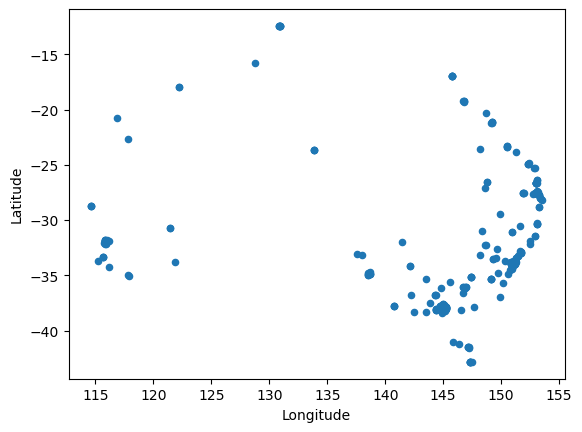

In [3]:
#vẽ đồ thị vị trí của các customer 
customer.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude')
plt.show()

In [4]:
df = customer.iloc[:, 11:13]
df

,Longitude,Latitude
0,145.206237,-38.025962
1,144.947676,-37.728991
2,152.519049,-32.197687
3,153.122555,-27.617230
4,145.197119,-37.990926
...,...,...
309,153.118374,-27.445906
310,153.103894,-27.425455
311,144.371612,-38.054289
312,147.383224,-35.121731


In [5]:
#chuẩn hóa dữ liệu 
sc = StandardScaler()
ctmr_stand = sc.fit_transform(df)
ctmr_stand

array([[ 1.67710508e-01, -9.79263193e-01],
       [ 1.45620939e-01, -9.31227846e-01],
       [ 7.92463711e-01, -3.65352625e-02],
       [ 8.44022842e-01,  7.04356944e-01],
       [ 1.66931542e-01, -9.73596045e-01],
       [-1.05816969e+00,  3.16069867e+00],
       [-2.33413079e+00, -4.57549807e-03],
       [ 1.38913815e-01, -9.28268988e-01],
       [ 3.73522148e-01, -9.47544291e-01],
       [ 9.45309706e-02, -9.92528938e-01],
       [ 7.79246249e-01,  1.14988937e+00],
       [ 6.83609645e-01,  1.31533088e+00],
       [ 6.20155422e-01,  1.39902792e+00],
       [-4.03635142e-01, -4.62935601e-01],
       [ 3.17859438e-01, -6.58230657e-01],
       [ 7.18485070e-01,  2.35603370e-01],
       [ 8.40971092e-01,  7.30456285e-01],
       [ 2.14420001e-01,  2.42862170e+00],
       [ 5.04875758e-01, -5.41994045e-01],
       [ 6.86733816e-01, -2.33022810e-01],
       [ 8.41194917e-01,  2.63063034e-01],
       [-1.05215845e+00,  3.15574151e+00],
       [ 9.72390501e-02, -1.00478520e+00],
       [ 8.

In [6]:
#chuyển dữ liệu sang dạng dataframe
ctmr_stand = pd.DataFrame(ctmr_stand, columns=['Longitude','Latitude'])
ctmr_stand

,Longitude,Latitude
0,0.167711,-0.979263
1,0.145621,-0.931228
2,0.792464,-0.036535
3,0.844023,0.704357
4,0.166932,-0.973596
...,...,...
309,0.843666,0.732069
310,0.842429,0.735377
311,0.096406,-0.983845
312,0.353696,-0.509502


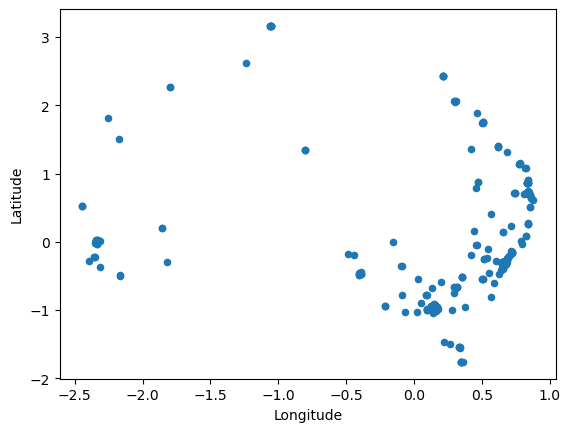

In [7]:
#vẽ đồ thị thể hiện mối tương quan của 2 trường Longitude và Latitude
ctmr_stand.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude')
plt.show()

# Tìm K phù hợp

In [8]:
Sum_of_square_distances = []
K = range(1,15)
for k in K:
    km  = KMeans(n_clusters=k)
    km = km.fit(ctmr_stand)
    Sum_of_square_distances.append(km.inertia_)
    #Sum_of_square_distances.append(sum(np.min(cdist(ctmr_stand,km.cluster_centers_,'euclidean'),axis=1)) / ctmr_stand.shape[0])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

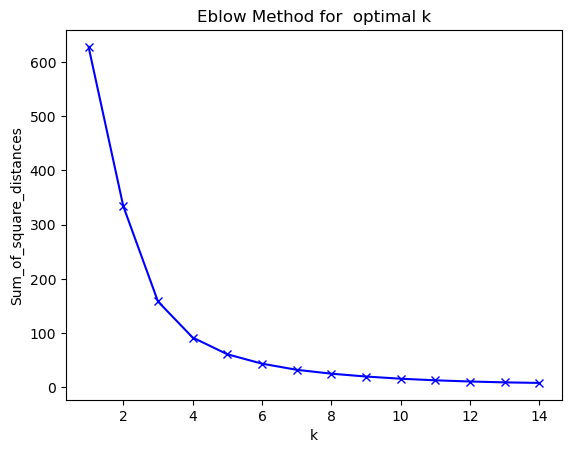

In [9]:
plt.plot(K, Sum_of_square_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_square_distances')
plt.title('Eblow Method for  optimal k')
plt.show()

In [10]:
#Chọn số cụm theo 
km3 = KMeans(n_clusters = 5)
km3 = km3.fit(df)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
print(km3.labels_)

[2 2 4 0 2 3 1 2 2 2 0 0 0 2 2 4 0 0 4 4 4 3 2 0 0 2 2 0 0 4 4 1 0 4 4 0 0
 4 4 2 1 2 2 2 4 2 2 2 0 0 0 0 2 0 2 0 4 2 4 2 4 4 4 2 2 4 4 4 1 2 1 1 2 4
 4 4 2 2 4 0 0 0 0 0 4 0 1 4 3 3 4 1 2 0 2 4 2 4 0 4 0 2 1 2 2 1 4 0 2 2 4
 2 4 2 2 1 4 0 4 1 2 2 2 0 2 2 2 2 2 4 0 4 0 0 0 0 1 4 4 1 0 1 4 4 0 0 0 4
 2 2 0 2 4 2 4 1 3 1 2 4 1 4 1 2 2 4 2 4 2 1 4 4 4 2 1 2 4 3 1 0 1 0 4 1 2
 2 0 4 1 0 0 2 4 3 1 0 4 3 3 4 2 4 0 0 2 2 4 2 1 4 4 0 4 1 4 1 4 0 4 0 2 0
 0 2 4 3 2 2 1 4 4 4 2 1 0 2 2 2 2 4 4 4 2 2 0 2 0 4 2 0 1 4 2 3 2 4 2 2 0
 2 0 0 1 1 0 2 0 0 4 1 4 2 2 2 4 4 0 2 2 2 4 3 2 2 2 4 2 0 4 2 2 3 2 0 2 2
 1 4 2 2 1 1 0 1 2 2 4 2 1 0 0 2 4 1]


In [12]:
labels = km3.labels_
labels = pd.DataFrame(labels, columns= ['cluster'])
df_clustered = pd.concat([df, labels], axis = 1)
df_clustered

,Longitude,Latitude,cluster
0,145.206237,-38.025962,2
1,144.947676,-37.728991,2
2,152.519049,-32.197687,4
3,153.122555,-27.617230,0
4,145.197119,-37.990926,2
...,...,...,...
309,153.118374,-27.445906,0
310,153.103894,-27.425455,0
311,144.371612,-38.054289,2
312,147.383224,-35.121731,4


In [13]:
centroids = km3.cluster_centers_
centroids = pd.DataFrame(centroids, columns = ['centroid_longi', 'centroid_lati'])
centroids

,centroid_longi,centroid_lati
0,151.327800,-25.074941
1,116.350438,-31.566376
2,143.923187,-37.460815
3,130.074713,-16.144207
4,150.730988,-33.487314


<Axes: xlabel='centroid_longi', ylabel='centroid_lati'>

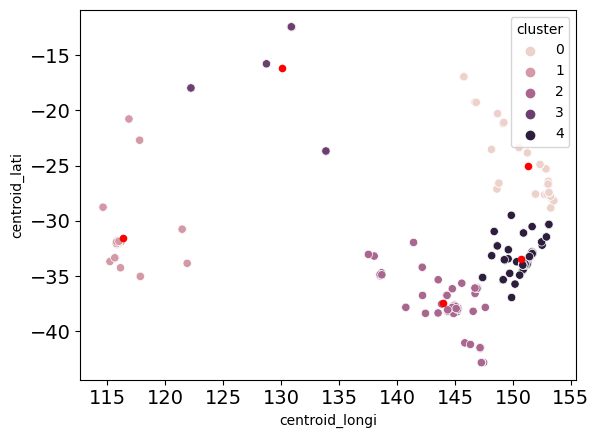

In [14]:
import seaborn as sns
s1 = sns.scatterplot(data = df_clustered, x = 'Longitude', y = 'Latitude', hue = 'cluster')
centroids.plot(ax=s1, kind = 'scatter', x = 'centroid_longi', y = 'centroid_lati', color = 'red', fontsize = 14)